In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.shape

(400, 11)

In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


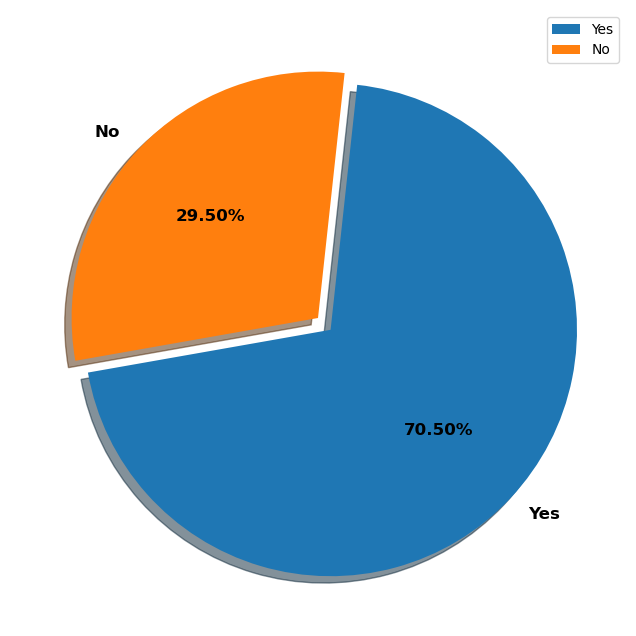

In [8]:
plt.figure(figsize = (12,8))
plt.pie(df['Urban'].value_counts(),
       labels=df.Urban.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.show()

In [9]:
df.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

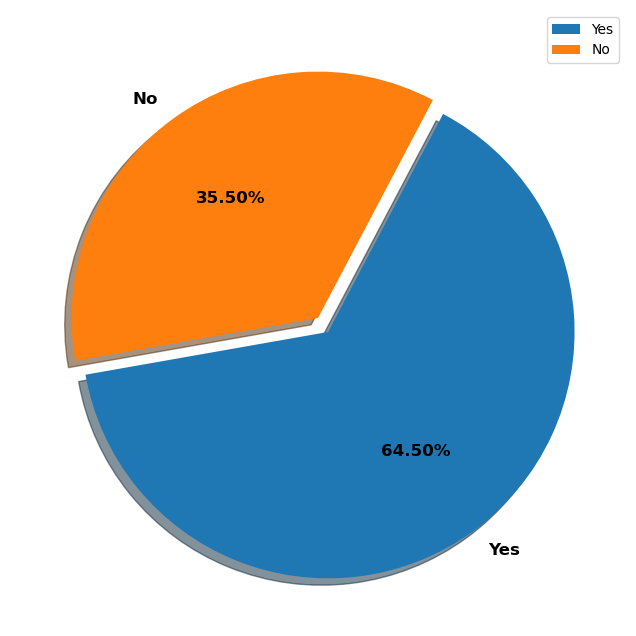

In [10]:
plt.figure(figsize = (12,8))
plt.pie(df['US'].value_counts(),
       labels=df.US.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.show()

In [11]:
df.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

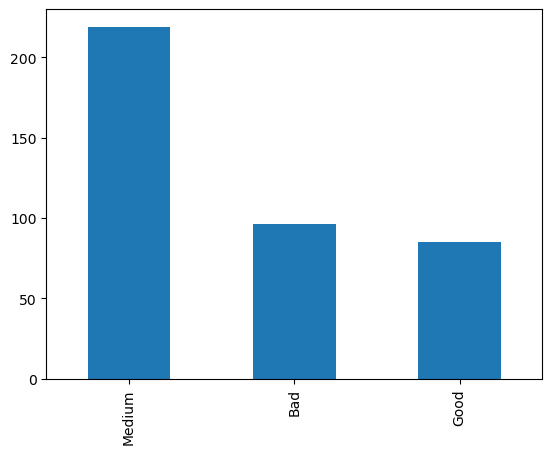

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [12]:
df['ShelveLoc'].value_counts(sort=True).plot.bar()
plt.show()
print(df['ShelveLoc'].value_counts())

In [13]:
df['Sales_Range'] = pd.cut(df.Sales,bins=[0,3,6,10,14,20],
                                     labels=['Poor','Below_Avg','Avg','Above_Avg','Outstanding'],include_lowest=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Range
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Avg
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Above_Avg
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Above_Avg
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Avg
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Below_Avg
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Above_Avg
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Avg
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Avg
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Below_Avg


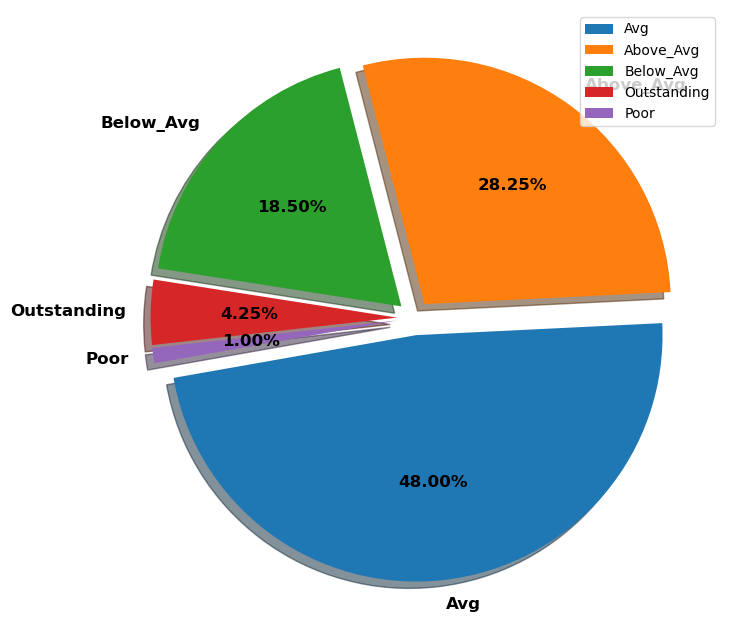

In [14]:
import matplotlib.pyplot as plt

# Calculate explode values based on the number of categories
explode = [0.07] * len(df['Sales_Range'].unique())

plt.figure(figsize=(12, 8))
plt.pie(df['Sales_Range'].value_counts(),
        labels=df.Sales_Range.unique(),
        explode=explode,
        autopct='%.2f%%',
        shadow=True,
        startangle=190,
        textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.show()


In [15]:
df.Sales_Range.value_counts()

Avg            192
Below_Avg      113
Above_Avg       74
Poor            17
Outstanding      4
Name: Sales_Range, dtype: int64

In [16]:
df1 = pd.get_dummies(df.iloc[:,1:11])
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [17]:
result = pd.concat([df['Sales_Range'], df1], axis=1)
display(result)

,Sales_Range,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Avg,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Above_Avg,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Above_Avg,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Avg,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Below_Avg,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Above_Avg,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Avg,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Avg,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Below_Avg,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [18]:
df2 = result.copy()
df2

,Sales_Range,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Avg,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Above_Avg,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Above_Avg,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Avg,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Below_Avg,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Above_Avg,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Avg,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Avg,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Below_Avg,100,79,7,284,95,50,12,1,0,0,0,1,0,1


# Model Building


# Building Decision Tree Classifier using Entropy Criteria


In [19]:
x=df2.iloc[:,1:]
y=df2['Sales_Range']

In [20]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.35,random_state=4,stratify=y)

In [21]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [22]:
Random_forest_results = cross_val_score(Random_forest_model, x_train, y_train, cv=kfold)
print(Random_forest_results.mean())

0.6615384615384615


In [23]:
Random_forest_preds = Random_forest_model.predict(x_test)
pd.crosstab(y_test,Random_forest_preds)

col_0,Above_Avg,Avg,Below_Avg,Poor
Sales_Range,,,,
Poor,0,1,5,0
Below_Avg,0,25,14,1
Avg,3,49,15,0
Above_Avg,13,13,0,0
Outstanding,1,0,0,0


In [24]:
np.mean(Random_forest_preds==y_test)

0.5428571428571428

In [25]:
print('Accuracy Score        :',accuracy_score(y_test,Random_forest_preds))
print('Classification Report :\n',classification_report(y_test,Random_forest_preds))

Accuracy Score        : 0.5428571428571428
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       0.76      0.50      0.60        26
         Avg       0.56      0.73      0.63        67
   Below_Avg       0.41      0.35      0.38        40
 Outstanding       0.00      0.00      0.00         1
        Poor       0.00      0.00      0.00         6

    accuracy                           0.54       140
   macro avg       0.35      0.32      0.32       140
weighted avg       0.53      0.54      0.52       140



C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model 2



In [26]:
x_train1, x_test1,y_train1,y_test1 = train_test_split(x,y, test_size=0.4,random_state=4,stratify=y)

In [27]:
num_trees = 150
max_features = 4
kfold = KFold(n_splits=15)
Random_forest_model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model1.fit(x_train1,y_train1)

RandomForestClassifier(max_features=4, n_estimators=150)

In [28]:
Random_forest_results1 = cross_val_score(Random_forest_model1, x_train1, y_train1, cv=kfold)
print(Random_forest_results1.mean())

0.65


In [29]:
Random_forest_preds1 = Random_forest_model1.predict(x_test1)
pd.crosstab(y_test1,Random_forest_preds1)

col_0,Above_Avg,Avg,Below_Avg
Sales_Range,,,
Poor,0,1,6
Below_Avg,0,21,24
Avg,7,57,13
Above_Avg,11,19,0
Outstanding,1,0,0


In [30]:
np.mean(Random_forest_preds1==y_test1)

0.575

In [31]:
print('Accuracy Score        :',accuracy_score(y_test1,Random_forest_preds1))
print('Classification Report :\n',classification_report(y_test1,Random_forest_preds1))

Accuracy Score        : 0.575
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       0.58      0.37      0.45        30
         Avg       0.58      0.74      0.65        77
   Below_Avg       0.56      0.53      0.55        45
 Outstanding       0.00      0.00      0.00         1
        Poor       0.00      0.00      0.00         7

    accuracy                           0.57       160
   macro avg       0.34      0.33      0.33       160
weighted avg       0.55      0.57      0.55       160



C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model 3



In [32]:
x_train2, x_test2,y_train2,y_test2 = train_test_split(x,y, test_size=0.33,random_state=82,stratify=y)

In [33]:
num_trees = 200
max_features = 5
kfold = KFold(n_splits=20)
Random_forest_model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model2.fit(x_train2,y_train2)

RandomForestClassifier(max_features=5, n_estimators=200)

In [34]:
Random_forest_results2 = cross_val_score(Random_forest_model2, x_train2, y_train2, cv=kfold)
print(Random_forest_results2.mean())

0.5879120879120878


In [35]:
Random_forest_preds2 = Random_forest_model2.predict(x_test2)
pd.crosstab(y_test2,Random_forest_preds2)

col_0,Above_Avg,Avg,Below_Avg,Poor
Sales_Range,,,,
Poor,0,0,5,1
Below_Avg,0,17,20,0
Avg,4,48,11,0
Above_Avg,10,15,0,0
Outstanding,1,0,0,0


In [36]:
np.mean(Random_forest_preds2==y_test2)

0.5984848484848485

In [37]:
print('Accuracy Score        :',accuracy_score(y_test2,Random_forest_preds2))
print('Classification Report :\n',classification_report(y_test2,Random_forest_preds2))

Accuracy Score        : 0.5984848484848485
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       0.67      0.40      0.50        25
         Avg       0.60      0.76      0.67        63
   Below_Avg       0.56      0.54      0.55        37
 Outstanding       0.00      0.00      0.00         1
        Poor       1.00      0.17      0.29         6

    accuracy                           0.60       132
   macro avg       0.56      0.37      0.40       132
weighted avg       0.61      0.60      0.58       132



C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Check Grid Search CV to get best Parameters


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming x_train and y_train are defined

# Define the parameter grid
param_grid = {
    'n_estimators': [5, 10, 15, 20, 30, 50, 75, 100, 125, 150, 175, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 6, 7, 8, 9, 10]
}

# Initialize GridSearchCV
grid_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid,
                       cv=5)

# Fit the grid search to the data
grid_cv.fit(x_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_cv.best_params_
best_score = grid_cv.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}
Best Score: 0.6576923076923078


# Now, build the model with max_depth 10 , Entropy Criteria , n_estimators - 150



In [39]:
rf_final = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,)
rf_final.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [40]:
y_pred_final_train = rf_final.predict(x_train)

In [41]:
print('Accuracy Score        :',accuracy_score(y_train,y_pred_final_train))
print('Classification Report :\n',classification_report(y_train,y_pred_final_train))

Accuracy Score        : 1.0
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       1.00      1.00      1.00        48
         Avg       1.00      1.00      1.00       125
   Below_Avg       1.00      1.00      1.00        73
 Outstanding       1.00      1.00      1.00         3
        Poor       1.00      1.00      1.00        11

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



# Testing Accuracy


In [42]:
y_pred_final_test = rf_final.predict(x_test)

In [43]:
print('Accuracy Score        :',accuracy_score(y_test,y_pred_final_test))
print('Classification Report :\n',classification_report(y_test,y_pred_final_test))

Accuracy Score        : 0.5428571428571428
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       0.62      0.38      0.48        26
         Avg       0.55      0.73      0.63        67
   Below_Avg       0.48      0.40      0.44        40
 Outstanding       0.00      0.00      0.00         1
        Poor       0.50      0.17      0.25         6

    accuracy                           0.54       140
   macro avg       0.43      0.34      0.36       140
weighted avg       0.54      0.54      0.53       140



C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vishal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
feature_importance = pd.DataFrame({ 'Features'  : x_train.columns,'RF_Features': rf_final.feature_importances_})
feature_importance

,Features,RF_Features
0,CompPrice,0.107206
1,Income,0.113609
2,Advertising,0.075669
3,Population,0.092276
4,Price,0.195043
5,Age,0.108612
6,Education,0.068505
7,ShelveLoc_Bad,0.065324
8,ShelveLoc_Good,0.067469
9,ShelveLoc_Medium,0.040912


In [45]:
Rf_feature_imp =feature_importance.sort_values(by= 'RF_Features',axis=0,ascending=False,)
Rf_feature_imp

,Features,RF_Features
4,Price,0.195043
1,Income,0.113609
5,Age,0.108612
0,CompPrice,0.107206
3,Population,0.092276
2,Advertising,0.075669
6,Education,0.068505
8,ShelveLoc_Good,0.067469
7,ShelveLoc_Bad,0.065324
9,ShelveLoc_Medium,0.040912


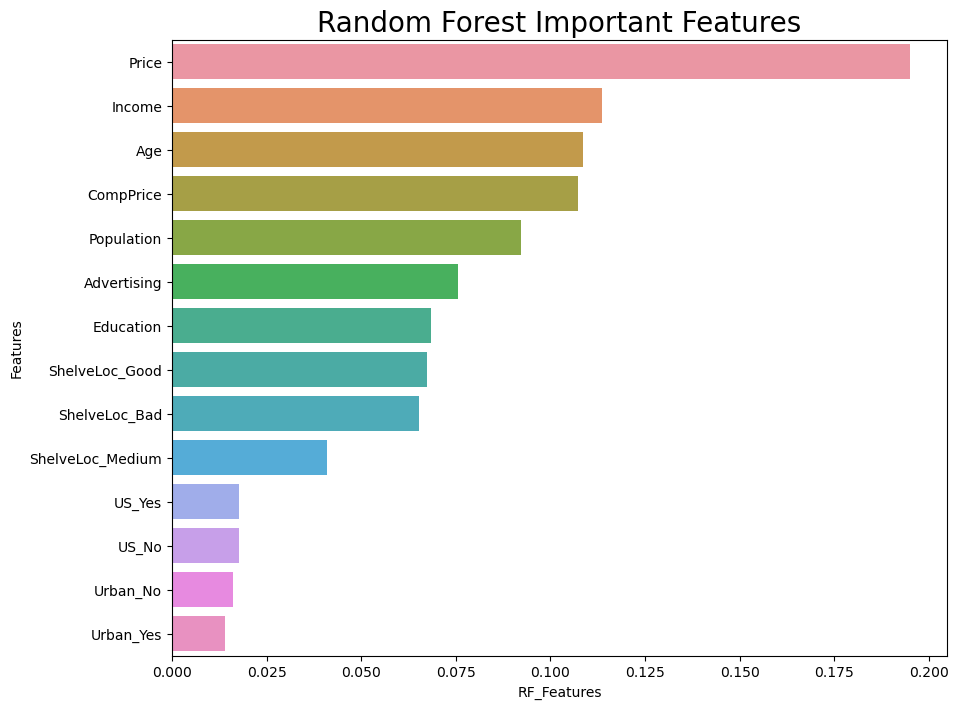

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF_Features',y='Features',data=Rf_feature_imp,)
plt.title('Random Forest Important Features',size = 20)
plt.show()

# End Assignment